<a href="https://colab.research.google.com/github/Claudio9701/classification_models_example/blob/master/classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificación de Infiltrados en el Programa de Infraestuctura

**Para desarrollar el ejercicio deben generar una copia de este documento en su propio drive, de lo contrario modificarán el ejemplo.**

## El primer paso es cargar las librerias necesarias para manejar, procesar y visualizar los datos y resultados

In [0]:
# Instalaciones necesarias en el servidor remoto 
!apt-get update -y
!apt-get install python-pydot -y --allow-unauthenticated

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 247 kB in 2s (125 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pydot is already the newest version (1.2.3-1).
0 upgraded, 0 newly installed, 0 to remo

In [0]:
# Dependencias de python

# Generales
import networkx as nx
import pandas as pd
import numpy as np
import random

# Modelos de clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Para visualizacion
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Carga las variables necesarias para entrenar / ajustar los modelos de clasificación

In [0]:
X_train_df = pd.read_csv('https://raw.githubusercontent.com/Claudio9701/classification_models_example/master/X_train.csv', index_col=0)
y_train_df = pd.read_csv('https://raw.githubusercontent.com/Claudio9701/classification_models_example/master/y_train.csv', index_col=0)

### Visualiza los datos y sus estadísticas básicas

In [0]:
# Información técnica de los datos
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 20875 to 23211
Data columns (total 16 columns):
tipo_vivienda         2062 non-null int64
material_externo      2062 non-null int64
material_pisos        2062 non-null int64
material_techos       2062 non-null int64
habitaciones          2062 non-null float64
lic_contruccion       2062 non-null int64
asist_construccion    2062 non-null int64
precio_alq            2062 non-null float64
titulo_prop           2062 non-null int64
agua_potable          2062 non-null int64
calidad_agua          2062 non-null int64
nivel_cloro_agua      2062 non-null float64
acceso_agua           2062 non-null int64
horas_agua            2062 non-null float64
dias_agua             2062 non-null float64
horas_agua_parcial    2062 non-null float64
dtypes: float64(6), int64(10)
memory usage: 273.9 KB


In [0]:
# Vistazo a las 5 primeras observaciones
X_train_df.head()

,tipo_vivienda,material_externo,material_pisos,material_techos,habitaciones,lic_contruccion,asist_construccion,precio_alq,titulo_prop,agua_potable,calidad_agua,nivel_cloro_agua,acceso_agua,horas_agua,dias_agua,horas_agua_parcial
id_hogar,,,,,,,,,,,,,,,,
20875,1,7,5,4,1.0,2,2,80.0,3,1,1,0.800000,1,24.000000,3.75,9.578947
40916,1,7,5,4,3.0,2,2,100.0,2,1,3,0.000000,1,20.884814,3.75,9.578947
23048,1,1,5,1,3.0,2,2,500.0,1,1,9,0.515843,1,24.000000,3.75,9.578947
23684,1,1,1,1,9.0,1,1,3000.0,1,1,2,0.200000,1,24.000000,3.75,9.578947
21355,1,1,5,4,4.0,2,2,600.0,1,1,1,0.600000,1,24.000000,3.75,9.578947


In [0]:
# Información técnica de los datos
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 20875 to 23211
Data columns (total 1 columns):
infiltrado    2062 non-null float64
dtypes: float64(1)
memory usage: 32.2 KB


In [0]:
# Vistazo a las 5 primeras observaciones
y_train_df.head()

,infiltrado
id_hogar,
20875,0.0
40916,0.0
23048,1.0
23684,1.0
21355,0.0


In [0]:
# Estadística descriptiva básica
X_train_df.describe()

,tipo_vivienda,material_externo,material_pisos,material_techos,habitaciones,lic_contruccion,asist_construccion,precio_alq,titulo_prop,agua_potable,calidad_agua,nivel_cloro_agua,acceso_agua,horas_agua,dias_agua,horas_agua_parcial
count,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.00000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000
mean,3.123181,3.839476,4.473812,3.534918,3.958387,2.06644,2.093113,767.272195,1.123666,1.005335,4.179437,0.512360,1.029098,20.808521,3.750970,9.584895
std,3.001109,3.632557,2.133134,2.988656,1.485732,0.84336,0.826573,559.100489,0.374765,0.072861,3.605592,0.259574,0.168122,5.185134,0.289093,1.536017
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,20.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,1.000000,3.000000,1.00000,1.000000,400.000000,1.000000,1.000000,1.000000,0.500000,1.000000,20.884814,3.750000,9.578947
50%,1.000000,1.000000,5.000000,1.000000,3.957029,2.00000,2.000000,772.686747,1.000000,1.000000,2.000000,0.515843,1.000000,24.000000,3.750000,9.578947
75%,8.000000,9.000000,7.000000,8.000000,4.000000,3.00000,3.000000,772.686747,1.000000,1.000000,9.000000,0.600000,1.000000,24.000000,3.750000,9.578947
max,8.000000,9.000000,7.000000,8.000000,14.000000,3.00000,3.000000,3250.000000,3.000000,2.000000,9.000000,1.400000,2.000000,24.000000,6.000000,24.000000


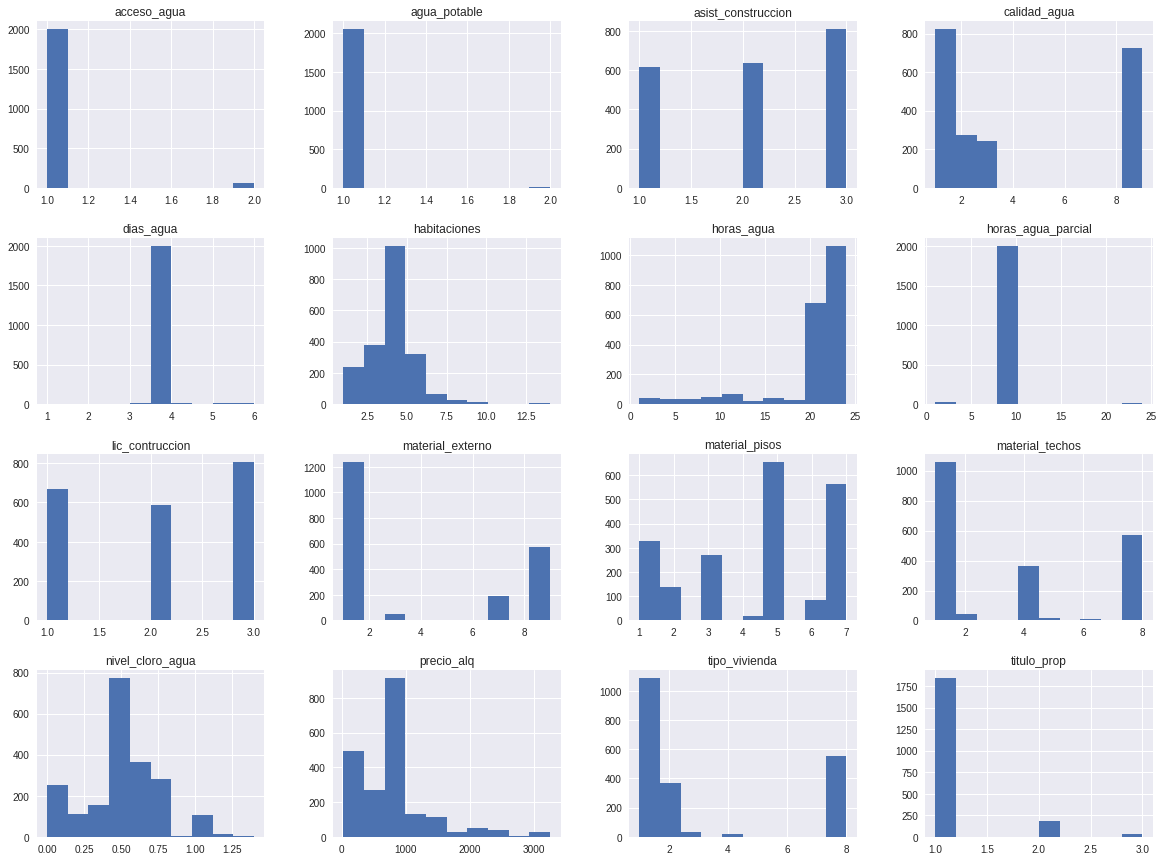

In [0]:
# Histograma de cada variable
X_train_df.hist(figsize=(20,15))
plt.show();

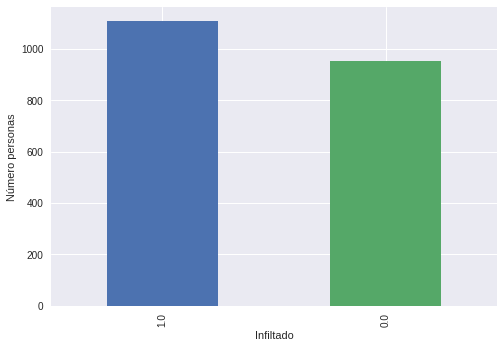

In [0]:
# Visualizamos la cantidad de infiltrados vs no infiltrados
y_train_df['infiltrado'].value_counts().plot(kind='bar')
plt.xlabel('Infiltado')
plt.ylabel('Número personas')
plt.show();

In [0]:
# Separamos las observaciones de infiltrados y no infiltrados para visualizar sus histogramas por separado
infiltrados = X_train_df[y_train_df['infiltrado']==1]
no_infiltrados = X_train_df[y_train_df['infiltrado']==0]   

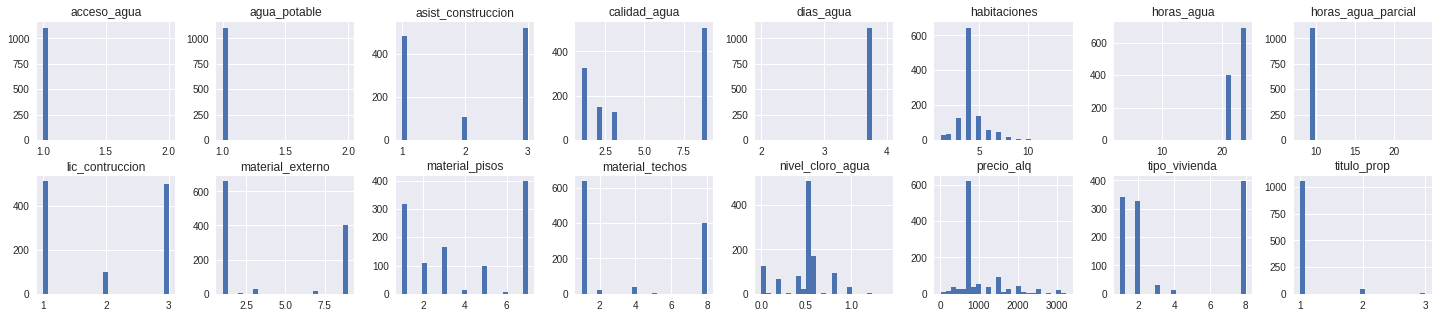

In [0]:
# Histograma de cada variable (infiltrados)
infiltrados.hist(figsize=(25,5) ,layout=(2,8), bins=25)
plt.show();

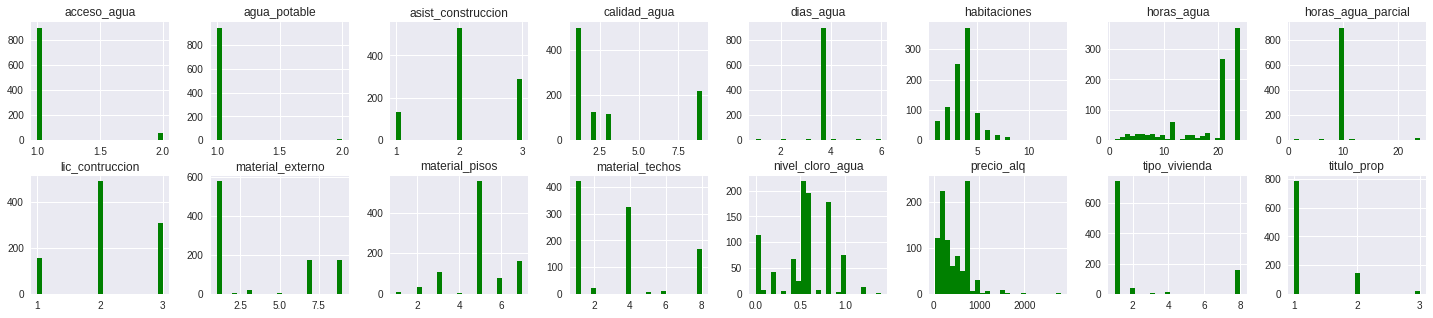

In [0]:
# Histograma de cada variable (no infiltrados)
no_infiltrados.hist(figsize=(25,5) ,layout=(2,8), bins=25, color='green')
plt.show();

## Procesamiento de datos con algoritmos de Clasificación


In [0]:
# Convierte la tabla a una matriz (numpy array) para utilizar los modelos de clasificación
X_train = X_train_df.values
y_train = y_train_df.values.flatten()


### Regresión Logística
[Más información sobre el modelo aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
)

Acierto en clasificacioón: 0.8428709990300679



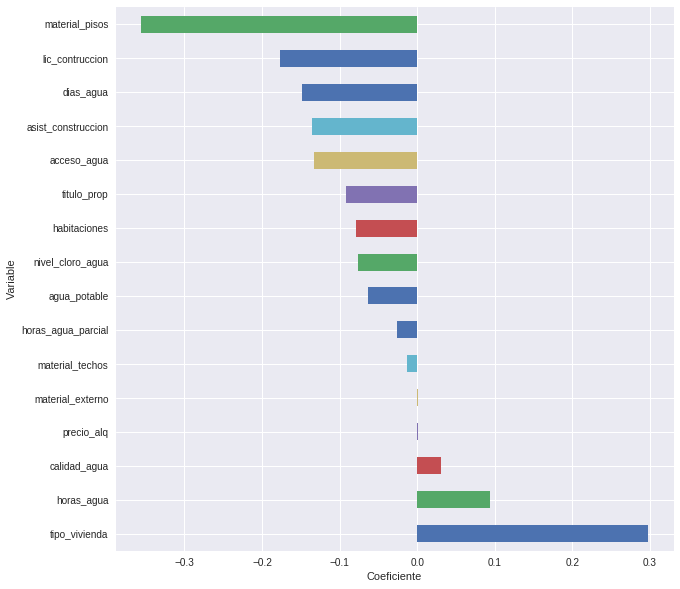

In [0]:

# Definimos entre los () el modelo y con .fit(datos_entrada, clase) ajustamos los pesos del modelo a los datos
reg_log = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

# Evaluamos el desempeño del modelo utilzanod .score(datos_entrada, clase)
reg_log_puntaje = reg_log.score(X_train, y_train)
print('Acierto en clasificacioón:', reg_log_puntaje)
print()

# Revisa los coeficientes de cada variables
feat_coef = pd.Series(reg_log.coef_.flatten(), index=X_train_df.columns) 
feat_coef.nlargest(20).plot(kind='barh', figsize=(10,10))
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.show();

###  K-Nearest-Neighbors

[Más información sobre el modelo aquí](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [0]:
# Definimos entre los () el modelo y con .fit(datos_entrada, clase) ajustamos los pesos del modelo a los datos
neigh = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)

# Evaluamos el desempeño del modelo utilzanod .score(datos_entrada, clase)
neigh_puntaje = neigh.score(X_train, y_train)
print('Acierto en clasificacioón:', neigh_puntaje)
print()

Acierto en clasificacioón: 0.8341416100872939



#### Visualizacion de las conexiones entre observaciones "vecinas"

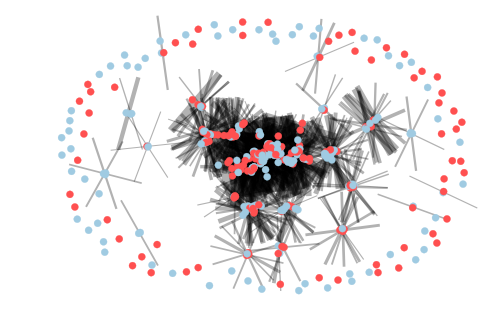

In [0]:
# Creamos un grafo (consiste de nodos y lados conectados entre sí)  
graph_as_nparray = neigh.kneighbors_graph(X=X_train, n_neighbors=15, mode='distance').toarray()
G = nx.from_numpy_array(graph_as_nparray)

# Elige una muestra de observaciones para visualizar
nodes_sample = np.random.randint(0,X_train.shape[0],size=round(X_train.shape[0]*0.2))
Gcc = G.subgraph(nodes_sample)

# Realiza el gráfico
pos = nx.spring_layout(Gcc)
color = ['#A0CBE2' if target == 1 else '#ff5050' for target in y_train[nodes_sample]]
nx.draw_networkx_nodes(Gcc, pos, node_size=50, node_color=color)
nx.draw_networkx_edges(Gcc, pos, alpha=0.3, width=75)
plt.axis('off')
plt.show();

### Árbol de Decisión para Clasificación 

[Más información sobre el modelo aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [0]:
# Definimos entre los () el modelo y con .fit(datos_entrada, clase) ajustamos los pesos del modelo a los datos
simple_tree = DecisionTreeClassifier(random_state=0, max_depth=3, max_features=3,
                                     max_leaf_nodes=3).fit(X_train, y_train)

# Evaluamos el desempeño del modelo utilzanod .score(datos_entrada, clase)
simple_tree_puntaje = simple_tree.score(X_train, y_train)
print('Acierto en clasificacioón:', simple_tree_puntaje)
print()

Acierto en clasificacioón: 0.7259941804073715



#### Visualización del árbol que hemos ajustado a nuestros datos

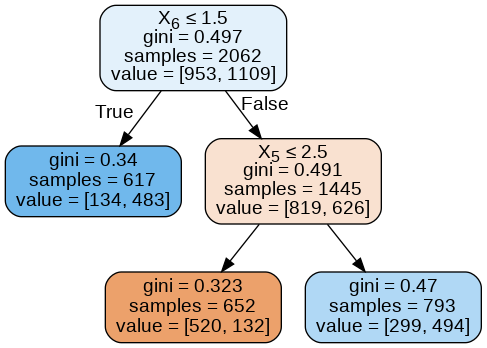

In [0]:
# ----- WARNING ----- 
# Esta celda demora en correr
# El tiempo y la visualización adecuada del árbol dependen de su complejidad
# ------------------- 


# Exportamos las variables necesarias para visualizar el árbol que creamos
dot_data = StringIO()
export_graphviz(simple_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

# Visualizamos el árbol
Image(graph.create_png())

### Conjunto de Árboles de Decisión Ensamblados
Se utilizan diferentes árboles de decisión en una "votación" para determinar la clase de cada observación

[Más información sobre el modelo aquí](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Acierto en clasificacioón: 0.8433559650824443



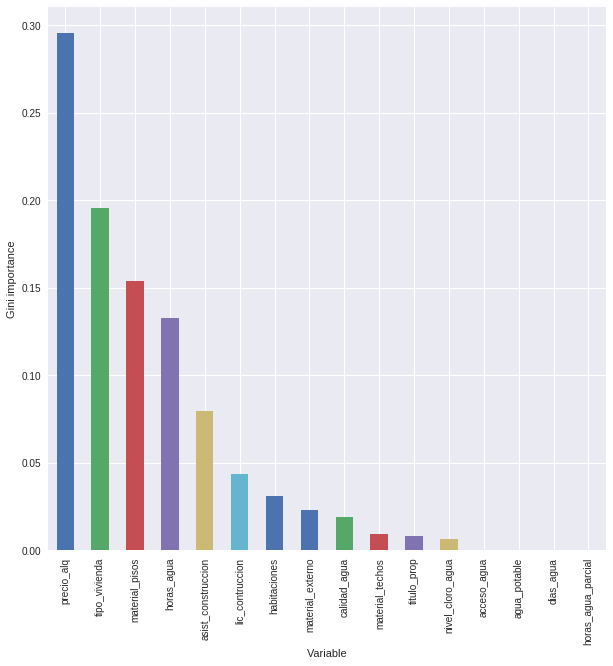

In [0]:
# Definimos entre los () el modelo y con .fit(datos_entrada, clase) ajustamos los pesos del modelo a los datos
forest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0).fit(X_train, y_train)

# Evaluamos el desempeño del modelo utilzanod .score(datos_entrada, clase)
forest_puntaje = forest.score(X_train, y_train)
print('Acierto en clasificacioón:', forest_puntaje)
print()

# Visualiza la importancia calculada para cada variable
feat_importances = pd.Series(forest.feature_importances_, index=X_train_df.columns)
feat_importances.nlargest(20).plot(kind='bar', figsize=(10,10))
plt.ylabel('Gini importance')
plt.xlabel('Variable')
plt.show();

## Ahora según la información obtenida en los pasos anteriores:

1. Prueba los modelos que consideres adecuados para este problema con datos nuevos y calcula su acierto en la clasificación
2. Justifica la elección de los modelos.
3. ¿Reemplazarías el uso de indicadores tradicionales por modelos estadísticos o de machine learning para la identificación de beneficiarios en el programa? ¿Por qué?

**PD: Sean concisos**

In [0]:
# Carga los datos de prueba
X_test_df = pd.read_csv('https://raw.githubusercontent.com/Claudio9701/classification_models_example/master/X_test.csv', index_col=0)
y_test_df = pd.read_csv('https://raw.githubusercontent.com/Claudio9701/classification_models_example/master/y_test.csv', index_col=0)

# Convierte la tabla a una matriz (numpy array) para utilizar los modelos de clasificación
X_test = X_test_df.values
y_test = y_test_df.values.flatten()